In [1]:
"""
In this example the use of ActiveLearner is demonstrated on the iris dataset in a pool-based sampling setting.
For more information on the iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set
For its scikit-learn interface, see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
"""

'\nIn this example the use of ActiveLearner is demonstrated on the iris dataset in a pool-based sampling setting.\nFor more information on the iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set\nFor its scikit-learn interface, see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html\n'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
import pandas as pd
from pandas.plotting import scatter_matrix

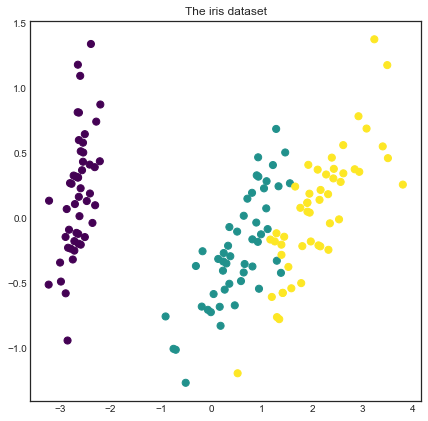

In [8]:
# loading the iris dataset
iris = load_iris()
# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(iris['data'])
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=iris['target'], cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

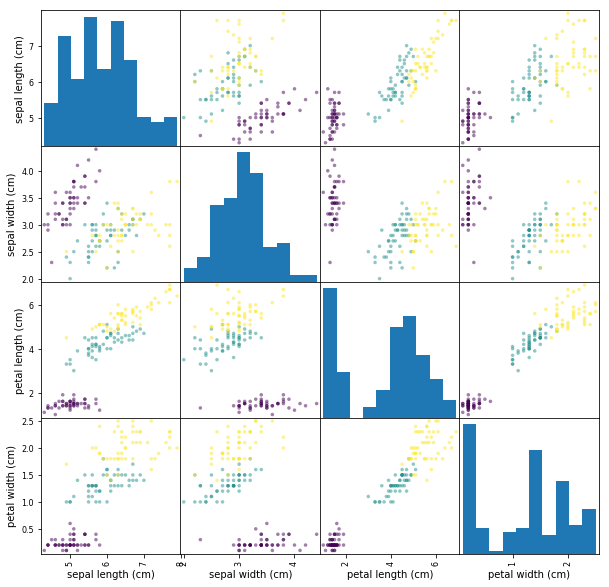

In [13]:
df = pd.DataFrame(iris['data'], columns = iris.feature_names)
scatter_matrix(df, c=iris['target'], figsize = [10,10], s=50);

In [17]:
# initial training data
train_idx = [0, 50, 100]
X_train = iris['data'][train_idx]
y_train = iris['target'][train_idx]

In [18]:
# generating the pool
X_pool = np.delete(iris['data'], train_idx, axis=0)
y_pool = np.delete(iris['target'], train_idx)

In [19]:
# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

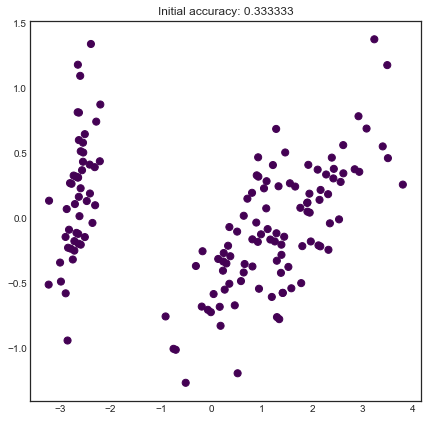

In [20]:
# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(iris['data'], iris['target']))
    plt.show()

In [21]:
print('Accuracy before active learning: %f' % learner.score(iris['data'], iris['target']))

Accuracy before active learning: 0.333333


In [24]:
# pool-based sampling
n_queries = 1
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(iris['data'], iris['target'])))

Accuracy after query no. 1: 0.900000


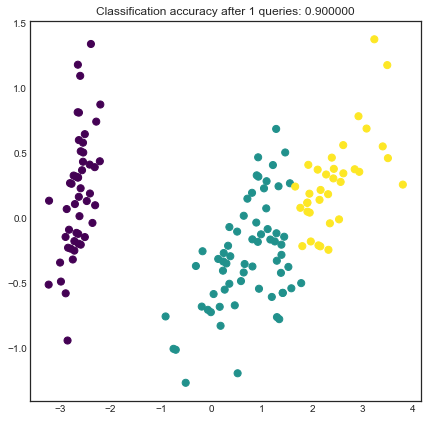

In [25]:
# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(iris['data'], iris['target'])))
    plt.show()